In [41]:
import os
import warnings
from pprint import pprint

In [42]:
import descarteslabs as dl

In [43]:
# *************FIND COUNTRY BOUNDARY ***************
matches = dl.places.find('burundi')
aoi = matches[0]
pprint(aoi)

# This area of interest just gives us some basic properties such as bounding boxes.
# To access a GeoJSON Geometry object of that place, we call the `Places.shape` method, in this case
# accessing a low-resolution version of this particular shape.
shape = dl.places.shape(aoi['slug'], geom='low')

{'bbox': [29.001302, -4.468538, 30.849959, -2.309987],
 'id': 85632285,
 'name': 'Burundi',
 'path': 'continent:africa_country:burundi',
 'placetype': 'country',
 'slug': 'africa_burundi'}


In [46]:
# import json

# *************FIND MATCHING SATELLITE IMAGES ***************
# PRODUCTS


# See what satellite products are available 
products = dl.metadata.available_products()
# pprint(products)

# isolate landsat 8 products
landsat_products = []
for product in products:
  if 'LC08'in product: 
    landsat_products.append(product)
# pprint(landsat_products)

feature_collection = dl.metadata.search(
    products='landsat:LC08:PRE:TOAR', 
    start_time='2014-03-12',
    end_time='2017-03-20',
    cloud_fraction= .2,
    place=aoi['slug'])

print (len(feature_collection['features']))

for f in feature_collection['features']:
    pprint('_________________')
    pprint(f['id'])
    pprint(f['properties']['acquired'])
    pprint(f['properties']['cloud_fraction'])

35
'_________________'
'landsat:LC08:PRE:TOAR:meta_LC81730632016187_v1'
'2016-07-05T08:14:46.002445Z'
0.1622
'_________________'
'landsat:LC08:PRE:TOAR:meta_LC81720632016244_v1'
'2016-08-31T08:08:53.086214Z'
0.0009
'_________________'
'landsat:LC08:PRE:TOAR:meta_LC81730632016251_v1'
'2016-09-07T08:15:05.788002Z'
0.1375
'_________________'
'landsat:LC08:PRE:TOAR:meta_LC81730612017013_v1'
'2017-01-13T08:14:15.303997Z'
0.1864
'_________________'
'landsat:LC08:PRE:TOAR:meta_LC81730632016171_v1'
'2016-06-19T08:14:36.721477Z'
0.0843
'_________________'
'landsat:LC08:PRE:TOAR:meta_LC81720622016148_v1'
'2016-05-27T08:07:56.623120Z'
0.1938
'_________________'
'landsat:LC08:PRE:TOAR:meta_LC81720622016196_v1'
'2016-07-14T08:08:15.110594Z'
0.0253
'_________________'
'landsat:LC08:PRE:TOAR:meta_LC81720622016228_v1'
'2016-08-15T08:08:22.190113Z'
0.1318
'_________________'
'landsat:LC08:PRE:TOAR:meta_LC81730612016235_v1'
'2016-08-22T08:14:12.534107Z'
0.1736
'_________________'
'landsat:LC08:PRE:TOAR:

In [47]:
# *************OUTPUT ARRAY ***************

# Rasterize the features.
#  * Select red, green, blue, alpha
#  * Scale the incoming data with range [0, 10000] down to [0, 4000] (40% TOAR)
#  * Choose an output type of "Byte" (uint8)
#  * Choose 60m resolution
#  * Apply a cutline of Burundi's boundary 
arr, meta = dl.raster.ndarray(
    "landsat:LC08:PRE:TOAR:meta_LC81720632016244_v1",
    bands=['red', 'green', 'blue', 'alpha'],
    scales=[[0,4000], [0, 4000], [0, 4000], None],
    data_type='Byte',
    resolution=60,
    cutline=shape['geometry']
)

# Note: A value of 1 in the alpha channel signifies where there is valid data.
# We use this throughout the majority of our imagery as a standard way of specifying
# valid or nodata regions. This is particularly helpful if a value of 0 in a particular
# band has meaning, rather than specifying a lack of data.

# *************TO DO, PLOT OR SAVE ALL IMAGES ***************
# *************FIND IDEAL TIME PERIOD FOR THIS DATASETS ***************
# Collect the id's for each feature
# ids = [f['id'] for f in feature_collection['features']]

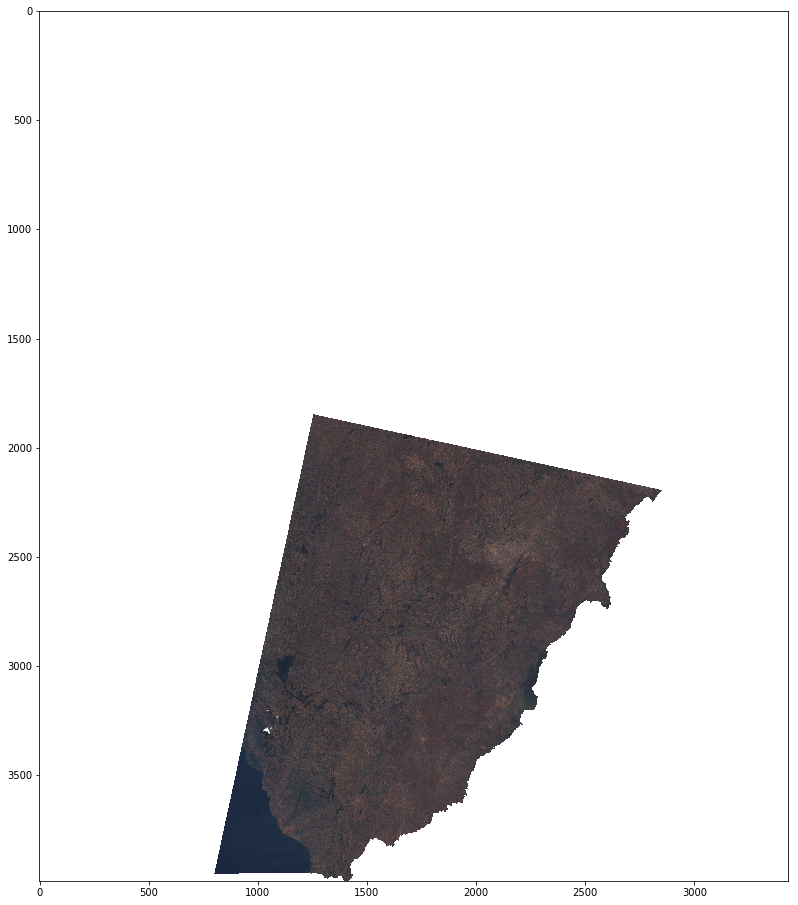

In [49]:
# *************PLOT SINGLE IMAGE ***************

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=[16,16])
plt.imshow(arr)

Next Steps:
1. Find and import Black Marble image into a different notebook. Note the year captured.
2. Identify all day Landsat 8 images over Burundi for the given Black Marble and output imagse from the year with less than 10% cloud cover.
3. Output the images, and select a subset that covers the country.
4. Feed the a